# Kubernetes (k8s)

Kubernetes is container orchestration system. With docker we can create containers on any system. But to create multiple containers on different servers we need kubernetes. Kubernetes handles all these stuff automatically.
Kubernetes is also known as k8s (there are 8 characters between 1st letter k and last letter s).


### What kubenetes takes care of?
- <b>Automatic deployment</b> of the containerized applications across different servers (bare metal or virtual or cloud servers).
- <b> Distribution of the load</b> across the multiple servers.This avoids under-utilisation or over-utilisations of resources.
- <b> Auto-scaling</b> of the deployed applications like increase quantity of containers across different servers.
- <b> Monitoring and health chek</b> of the containers.
- <b>Replacement</b> of the failed containers.

### Supported Container Runtimes
- Docker
- CRI-O
- containerd

## Pod
- POD is the smallest unit in the kubenetes world. 
- Containers are created inside of pod.

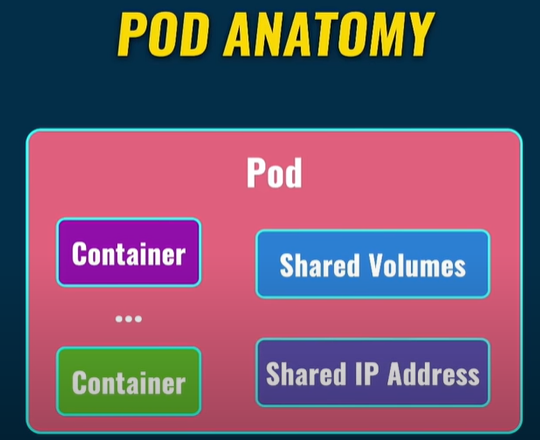

- Most commonly, single container per pod is created. But if there is requirement of multiple containers to share the network or volumes then they are fitted inside single pod under same namespace.
- Each pod must be located on same server.

## Kubernetes cluster
- Cluster contains multiple nodes (servers). They could be located in different data centers, in different geographis.
- Usually nodes belonging to same cluster are located close to each other to perform efficiently.
- Inside of node there pods, which is the smallest unit in kubernetes. 
- Inside pods there are containers.

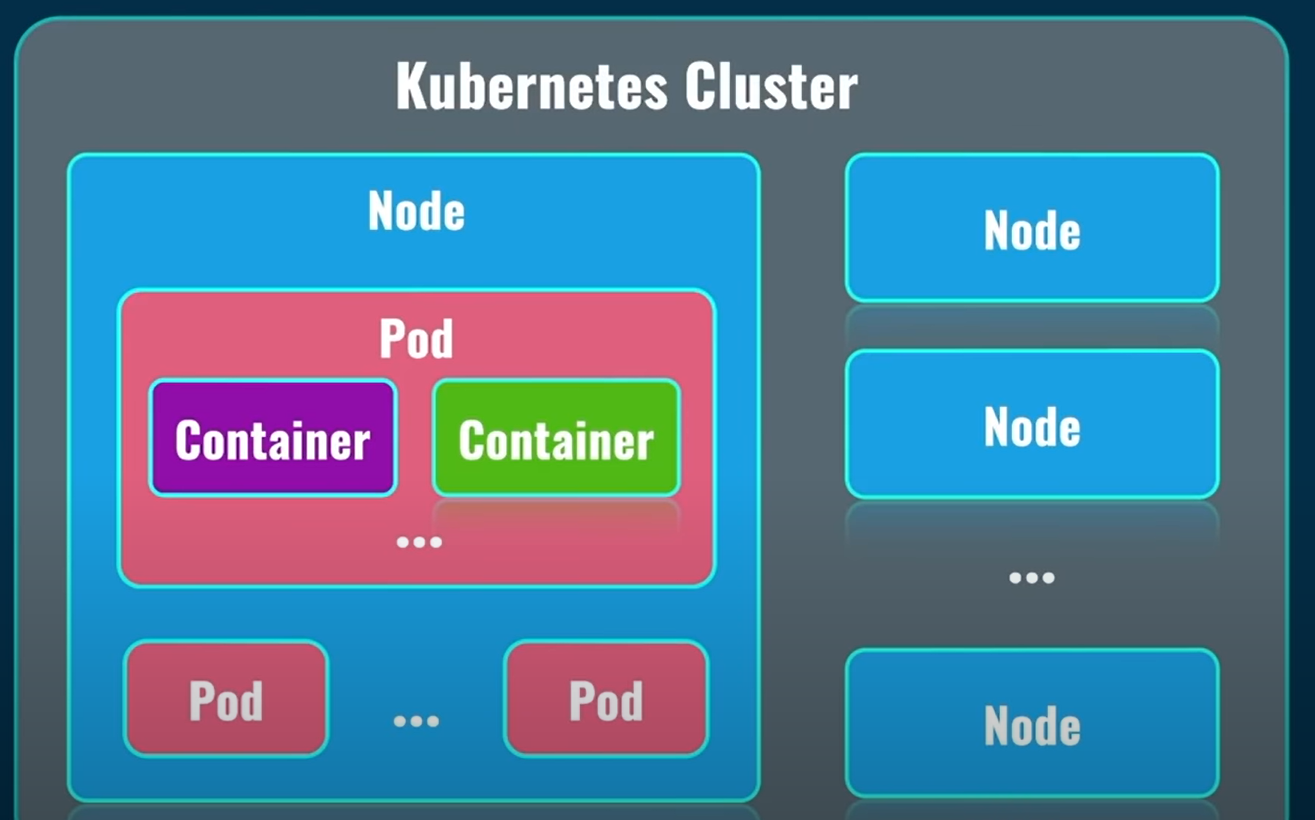

- Management of these nodes and communication between different nodes of same cluster is taken care by master node. Master node distributes load on worker nodes. All application is deployed on worker node

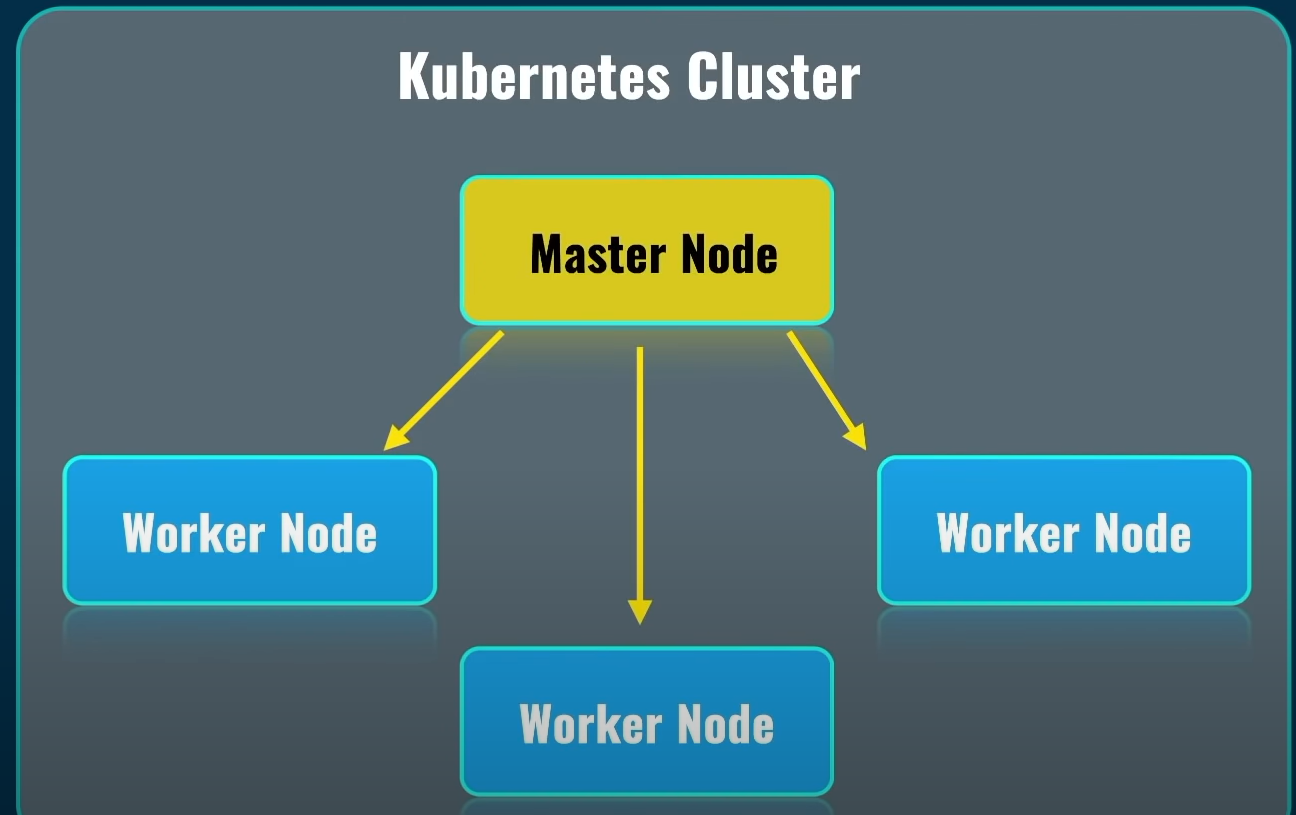

- Below image shows which services runs on different nodes.
- Container runtime runs actual containers inside each node.
- Kubelete is present on each node and it communicates with API server on master node.
- Kubeproxy is also present on each node, it is responsible for network communication inside node and between different node.
- Scheduler is only present on master node and it is responsible for load distribution on worker nodes.
- Kube controller manager which is only available on master node and it controls everything on kubernetes cluster.
- Cloud controller manager which is only available on master node and it interacts with cloud service manager.
- Also on master node we have etcd, which logs all operations happening on kubernetes cluster.
- API server which is present on master node, is the main service and helps you manage entire kubernetes cluster.

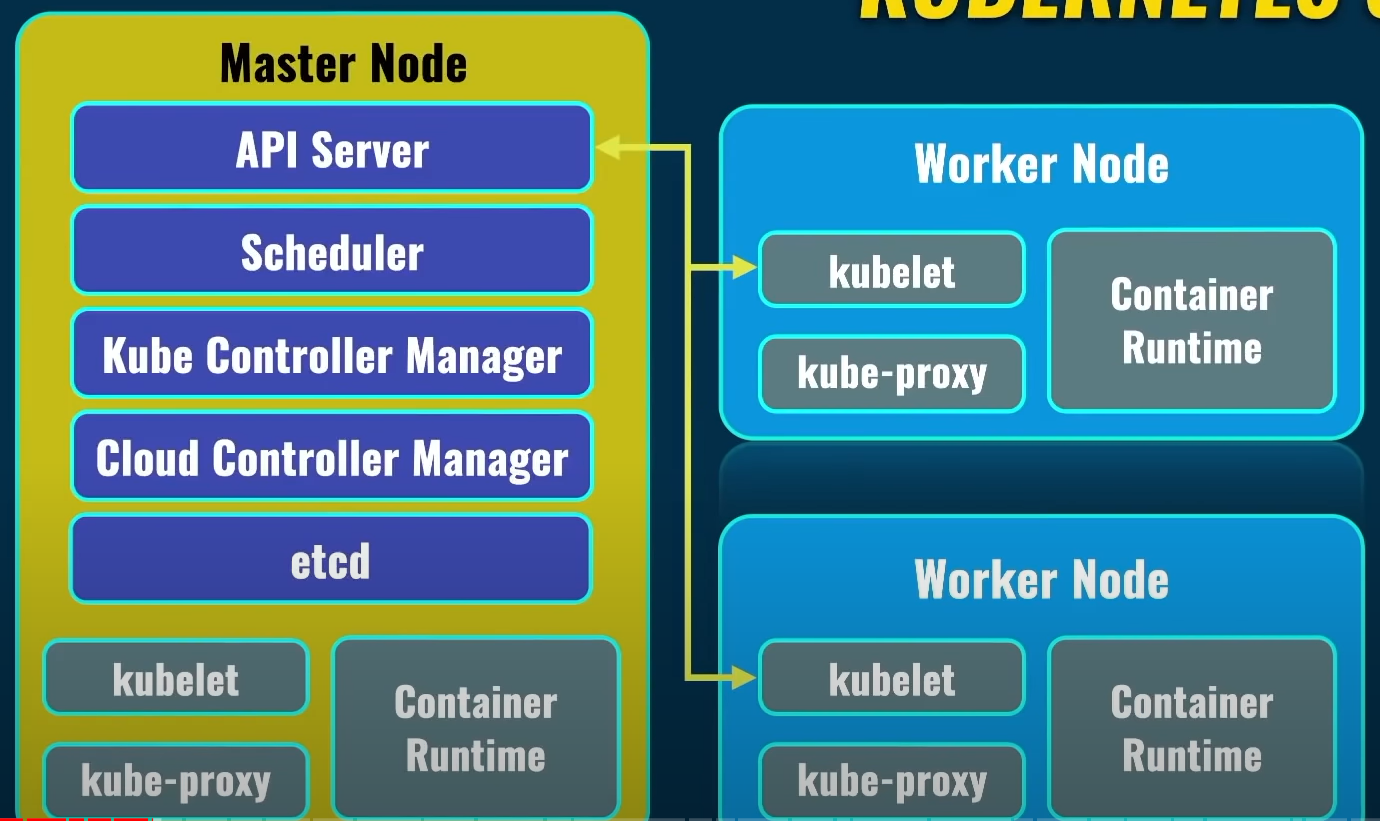

## Starting Cluster

- To create cluster on local laptop we can use minikube or kind. But here i'll use minikube.
- If you have subscription for any of the cloud service provider then you can use their service to create cluster.
- To start cluster on local laptop you can type `minikube start` command but first check the status using `minikube status`.
- Above command will start the cluster. Now you can check the status using command `minikube status`.
- To get ip address of that node use `minikube ip`.
- Here we're using docker as virtualisation tool, our cluster is created on docker as a container.
- So get inside that node we need to use simple docker command `docker exec -it <container_id> bash`
- From inside this node, we can check which all services are present in it by using `docker ps`. 

## Handy Commands for Kubectl
- To get all nodes type : `kubectl get nodes`
- To list all pods in your default namespace : `kubectl get pods`
- To list all namespaces in cluster: `kubectl get namespaces`
- To list all pods in another namespace: `kubectl get pods --namespace=kube-system`
- To create or start a pod: `kubectl run <pod_name> --image=<image_name>` for ex: `kubectl run nginx --image=nginx`
- To get details about a running pod: `kubectl describe pod <pod_name>`
- To get pods with their ip address: `kubectl get pods -o wide`
- To delete pod: `kubectl delete pod <pod_name>`
- To create deployment: ` kubectl create deployment <deployment_name> --image=<image_name>`
- To get details of this deployment: `kubectl describe deployyment <deployment_name>`
- To scaled up the number of pods in deployment: `kubectl scale deployment <deployment_name> --replicas=<number_of_pods>`
- To create a service or expose a port: `kubectl expose deployment <deployment_name> --port=<external_port_on_which_u_can_access> --target-port=<port_of_application_inside_pod>`
- To list services: `kubectl get svc`
- To get details of service: `kubectl describe svc <service_name>`
- To delete any resource (deployment/svc/pods): `kubectl delete <resource> <name_of_hosted_resource>`

## Connecting to pod ip adress from local laptop (externally relative to pod)
- Using deployment we can create multiple pods for same application and distribute load across those pods.
- command to create such deployment: ` kubectl create deployment <deployment_name> --image=<image_name>` This will create a deployment using image which is available on docker hub.
- To get details of this deployment: `kubectl describe deployyment <deployment_name>`
- By default this deployment creates single pod, to scaled up the number of pods type `kubectl scale deployment <deployment_name> --replicas=<number_of_pods>`
- To expose port of node to internally which will be pointing to port of the application `kubectl expose deployment <deployment_name> --port=<internal_port_of_node> --target-port=<port_of_application_inside_pod>`
- as we have exposed this port, it has started new service and To list services: `kubectl get svc`
- Above mentioned command gives you ip address of cluster but that is only accessible from inside of cluster. You cannot access it from outside. That ip can connect to any of the pod which are available for that deployment
- To expose port externally, so that it will be accessible from outside of node `kubectl expose deployment <deployment_name> --type=NodePort --port=<internal_port_of_node> --target-port=<port_of_application_inside_pod>`
- now to tunnel this ip outside docker env, use `minikube service <deployment_name>`, it will automatically open the page on default browser.